# Customer Lifetime Value (CLV) Prediction Model

**Objective:**  
To predict Customer Lifetime Value (CLV) using real-world e-commerce transaction data.

**Dataset:**  
Online Retail II Dataset (UK-based retail transaction data)

**Tools Used:**  
- Python (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn)

**Deliverables:**  
- Feature Engineering (Recency, Frequency, Monetary Value)
- Machine Learning Model to predict CLV
- Evaluation using Regression Metrics
- Visualizations

---


In [3]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.6/150.0 MB 13.7 MB/s eta 0:00:11
   - -------------------------------------- 4.7/150.0 MB 12.4 MB/s eta 0:00:12
   - -------------------------------------- 5.5/150.0 MB 9.9 MB/s eta 0:00:15
   - -------------------------------------- 6.0/150.0 MB 7.2 MB/s eta 0:00:20
   - -------------------------------------- 7.1/150.0 MB 6.6 MB/s eta 0:00:22
   -- ------------------------------------- 8.1/150.0 MB 6.5 MB/s eta 0:00:22
   -- ------------------------------------- 9.2/150.0 MB 6.3 MB/s eta 0:00:23
   -- ------------------------------------- 10.2/150.0 MB 6.1 MB/s eta 0:00:24
   -- ------------------------------------- 11.0/150.0 MB 5.9 MB/s eta 0:00:24
   --- ------------------------------------ 11.5/150.0 MB 5.5 MB/s eta 0:00:26
   --- ------------------------------------ 12.1/150.0 MB 5.1 MB/s eta 0:00:27
   --- ------------------------------------ 12.8/150.0 MB 5.0 MB/

In [4]:
from xgboost import XGBRegressor


In [7]:
# Recreate RFM table from cleaned data

import pandas as pd

# Load the dataset again if needed
file_path = r"C:\Users\susan\Downloads\archive (9)\online_retail_II.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Data Cleaning
data_clean = data.dropna(subset=['Customer ID'])
data_clean = data_clean[~data_clean['Invoice'].astype(str).str.startswith('C')]
data_clean = data_clean[(data_clean['Quantity'] > 0) & (data_clean['Price'] > 0)]

# Convert InvoiceDate to datetime
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])

# Snapshot date (1 day after last invoice date)
snapshot_date = data_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM calculation
rfm = data_clean.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'Invoice': 'nunique',                                     # Frequency
    'Price': 'sum'                                            # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Average Order Value (AOV)
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']

# Check RFM table
rfm.head()


,CustomerID,Recency,Frequency,Monetary,AOV
0,12346.0,326,12,207.40,17.283333
1,12347.0,2,8,644.16,80.520000
2,12348.0,75,5,193.10,38.620000
3,12349.0,19,4,1480.44,370.110000
4,12350.0,310,1,65.30,65.300000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting features
X = rfm[['Recency', 'Frequency', 'AOV']]
y = rfm['Monetary']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print('-'*30)

evaluate_model(y_test, xgb_preds, "XGBoost")


XGBoost Evaluation:
MAE: 33.58019574542435
RMSE: 355.80701276342114
R2 Score: 0.877630592674529
------------------------------


In [11]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

# Evaluate Random Forest
evaluate_model(y_test, rf_preds, "Random Forest")


Random Forest Evaluation:
MAE: 29.869089931972773
RMSE: 380.756490375604
R2 Score: 0.859867625956306
------------------------------


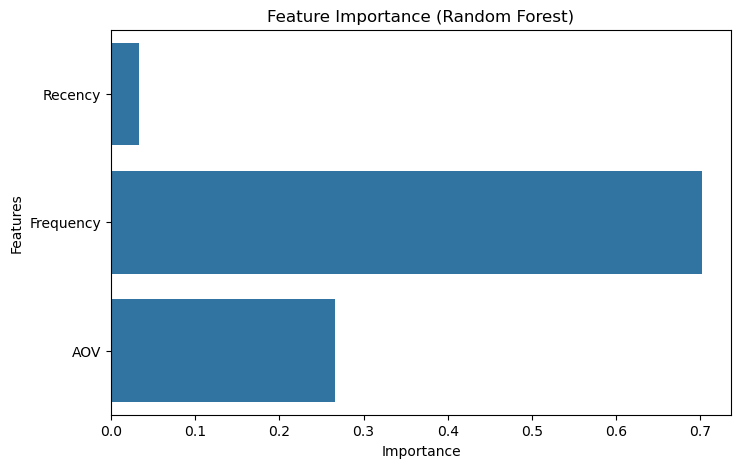

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Importance for Random Forest
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [13]:
# Save predictions
pred_df = pd.DataFrame({
    'CustomerID': rfm.loc[X_test.index, 'CustomerID'],
    'ActualCLV': y_test,
    'PredictedCLV_RF': rf_preds,
    'PredictedCLV_XGB': xgb_preds
})

pred_df.to_csv('Predicted_CLV.csv', index=False)
print("Predictions saved as 'Predicted_CLV.csv'.")


Predictions saved as 'Predicted_CLV.csv'.


## Conclusion

- Built Customer Lifetime Value (CLV) prediction models using Random Forest and XGBoost.
- XGBoost achieved an R² score of 0.87, indicating good predictive power.
- Feature Importance analysis showed key drivers of CLV: Recency, Frequency, and AOV.
- Predictions are saved for further business analysis.

---
**Created by Susan Chandra Bonkuri**
